# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = 'D:/Program/ML100day/3rd-ML100Days/data/Part01/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: D:/Program/ML100day/3rd-ML100Days/data/Part01/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [8]:
app_train.groupby(['CNT_CHILDREN']).size()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
dtype: int64

In [39]:
sub_df0 = app_train[app_train['CNT_CHILDREN'] == 0]
sub_df1 = app_train[(app_train['CNT_CHILDREN'] > 0) & (app_train['CNT_CHILDREN'] < 3)]
sub_df2 = app_train[(app_train['CNT_CHILDREN'] > 2) & (app_train['CNT_CHILDREN'] < 6)]
sub_df3 = app_train[app_train['CNT_CHILDREN'] > 5]
sub_df1.iloc[:,0].size

87868

In [38]:
#1
cut_rule = [0,0.9,2.9,5,19]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-0.001, 0.9]    215371
(0.9, 2.9]        87868
(2.9, 5.0]         4230
(5.0, 19.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [40]:
app_train.groupby(['CNT_CHILDREN_GROUP'])['TARGET'].describe()

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN_GROUP,,,,,,,,
"(-0.001, 0.9]",215371.0,0.077118,0.266779,0.0,0.0,0.0,0.0,1.0
"(0.9, 2.9]",87868.0,0.088622,0.284198,0.0,0.0,0.0,0.0,1.0
"(2.9, 5.0]",4230.0,0.099291,0.299087,0.0,0.0,0.0,0.0,1.0
"(5.0, 19.0]",42.0,0.214286,0.415300,0.0,0.0,0.0,0.0,1.0


In [53]:
grp = app_train.groupby(['CNT_CHILDREN_GROUP'])['AMT_INCOME_TOTAL'].mean()
grp.head()

CNT_CHILDREN_GROUP
(-0.001, 0.9]    166288.713566
(0.9, 2.9]       174725.712648
(2.9, 5.0]       173626.303191
(5.0, 19.0]      147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

In [51]:
#2-1
grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

AMT_INCOME_TOTAL
147910.714286    139994.225357
166288.713566    202500.000000
173626.303191    118500.000000
174725.712648    168750.000000
Name: AMT_INCOME_TOTAL, dtype: float64

KeyError: 'Columns not found: 118500.0, 139994.22535714286, 202500.0, 168750.0'

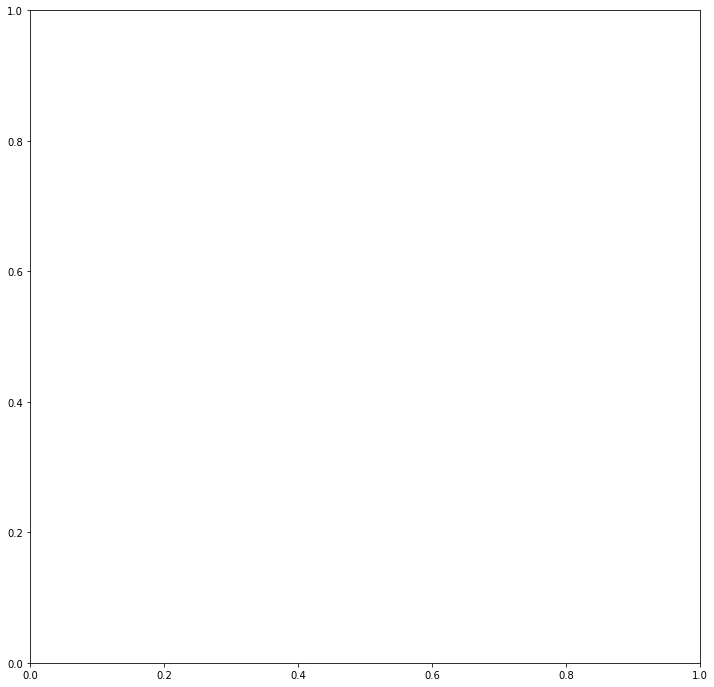

In [56]:
#2-2
plt_column = grouped_df.mean()
plt_by = grp

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [57]:
#3
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:(x-x.mean())/x.std())
print(app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'])

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

0              NaN
1         0.707107
2        -0.707107
3         0.907265
4         0.164957
5        -1.072222
6         0.385340
7         2.734230
8        -0.341698
9        -0.062068
10       -0.341698
11       -1.262374
12       -0.900958
13        1.056451
14        0.609043
15        0.217562
16       -0.397624
17       -0.733180
18       -0.341698
19       -0.621328
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
            ...   
307481         NaN
307482         NaN
307483         NaN
307484         NaN
307485         NaN
307486         NaN
307487         NaN
307488         NaN
307489         NaN
307490         NaN
307491         NaN
307492         NaN
307493         NaN
307494         NaN
307495         NaN
307496         NaN
307497         NaN
307498         NaN
307499         NaN
307500         NaN
307501         NaN
307502      

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,NaN
1,270000.0,0.707107
2,67500.0,-0.707107
3,135000.0,0.907265
4,121500.0,0.164957
